# Pymaceuticals Inc.
---

### Analysis

- Three observations that can be made from the data:
    - Campomulin and Ramicane are potentially the more effective treatments. The box plot comparing the tumor volume distributions for different treatment regimens shows that Capomulin and Ramicane have lower median tumor volumes compared to Infubinol and Ceftamin. Additionally, the interquartile range (IQR) for Capomulin and Ramicane is narrower, indicating more consistent results. This suggests that Capomulin and Ramicane may be more effective in reducing tumor volumes compared to Infubinol and Ceftamin.
    - Mouse weight has a positive correlation with tumor volume. The scatter plot of mouse weight vs. average observed tumor volume for the entire Capomulin regimen shows a positive correlation between mouse weight and average tumor volume. The correlation coefficient value close to 1 (positive value) indicates that as the mouse weight increases, the average tumor volume tends to increase as well. This suggests that there might be a relationship between mouse weight and tumor development, and heavier mice tend to have larger tumor volumes.
    - Tumor volume decreases over time with the Capomulin treatment. The line plot of tumor volume vs. time point for a single mouse treated with Capomulin shows a decreasing trend in tumor volume over time. This indicates that Capomulin treatment has a positive effect on tumor growth inhibition. This observation is further supported by the overall trend in the Capomulin treatment regimen, where the average tumor volume tends to decrease over the course of treatment.


 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
print(f"Number of mice in the dataset: {num_mice}")

Number of mice in the dataset: 249


In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_mice["Mouse ID"].unique()
print("Duplicate mice by ID number that shows up for Mouse ID and Timepoint:")
print(duplicate_mice)

Duplicate mice by ID number that shows up for Mouse ID and Timepoint:
['g989']


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset="Mouse ID", keep="first")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [50]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_data["Mouse ID"].unique())
print(f"Number of mice in the clean DataFrame: {num_mice_clean}")

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Variance Tumor Volume",
    "std": "Standard Deviation Tumor Volume",
    "sem": "SEM Tumor Volume"
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    standard_deviation="std",
    SEM="sem"
).reset_index()
summary_stats = summary_stats.style.set_caption("Tumor Volume (mm3)")
summary_stats

,Drug Regimen,mean,median,variance,standard_deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

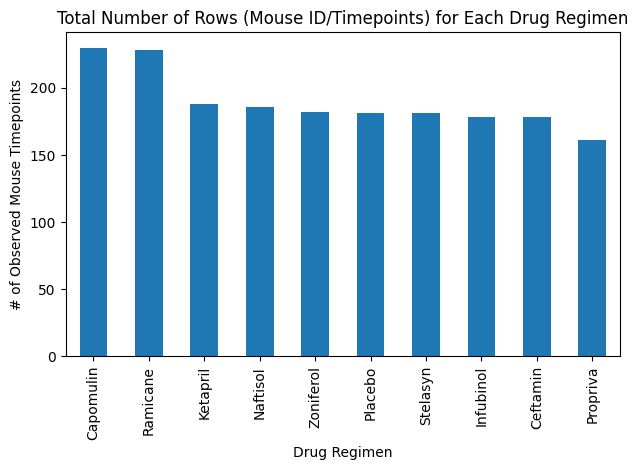

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = combined_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")

# Show the plot
plt.tight_layout()
plt.show()


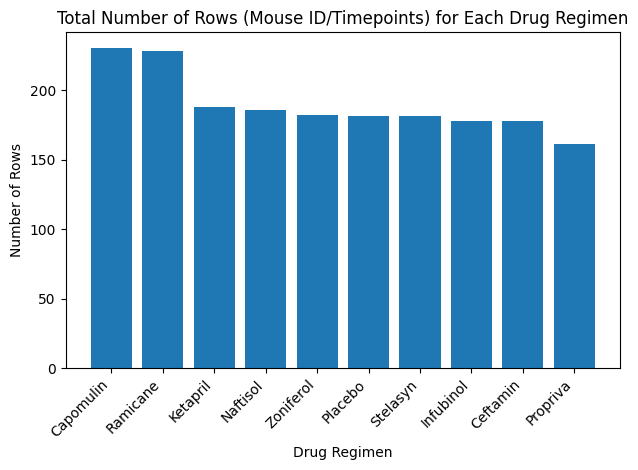

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

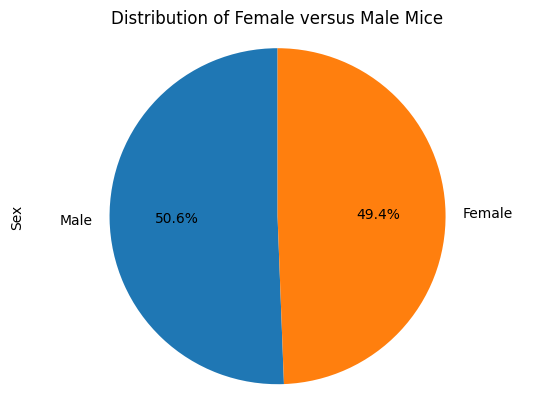

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = combined_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

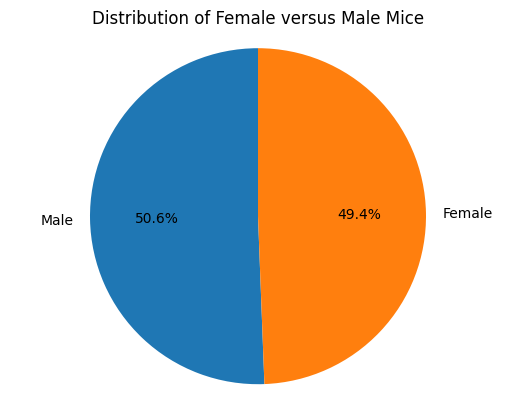

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = combined_data[combined_data["Drug Regimen"].isin(treatment_regimens)]
last_timepoint_per_mouse = filtered_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_per_mouse = pd.merge(filtered_data, last_timepoint_per_mouse, on=["Mouse ID", "Timepoint"])
final_tumor_volume_per_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_per_mouse.loc[final_tumor_volume_per_mouse["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


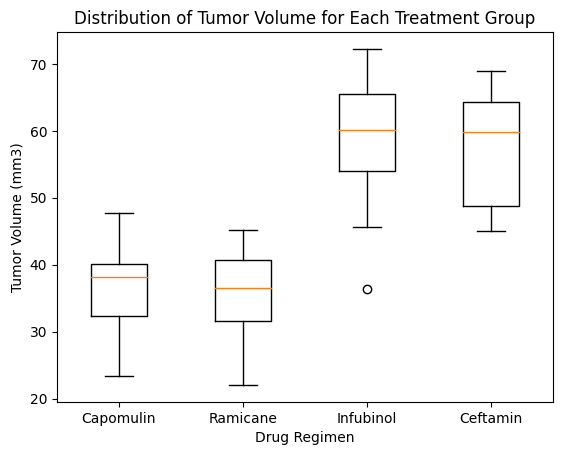

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

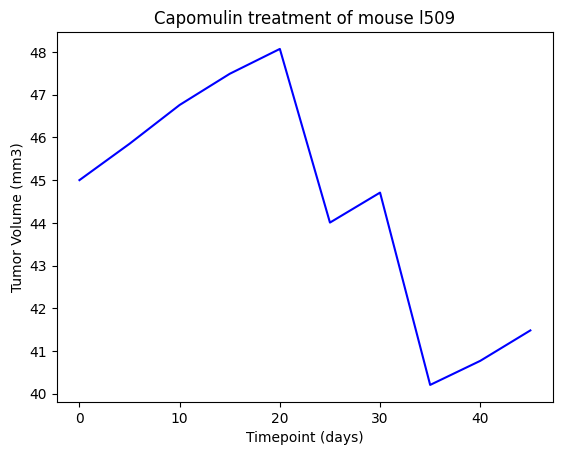

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
selected_mouse = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], linestyle="-", color="b")
plt.title(f"Capomulin treatment of mouse {selected_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

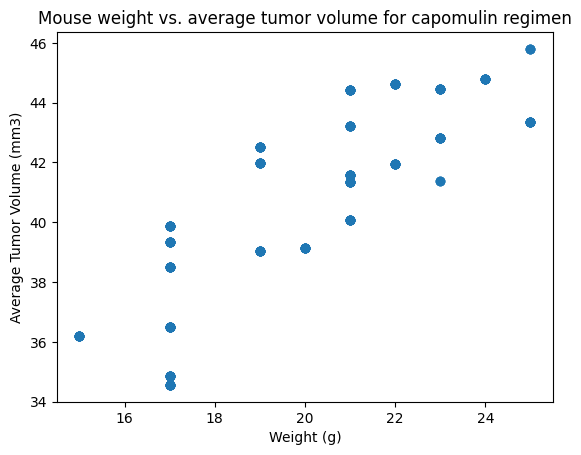

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_average_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
capomulin_average_data.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"}, inplace=True)
plt.scatter(capomulin_average_data["Weight (g)"], capomulin_average_data["Average Tumor Volume (mm3)"], marker="o")
plt.title("Mouse weight vs. average tumor volume for capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83.


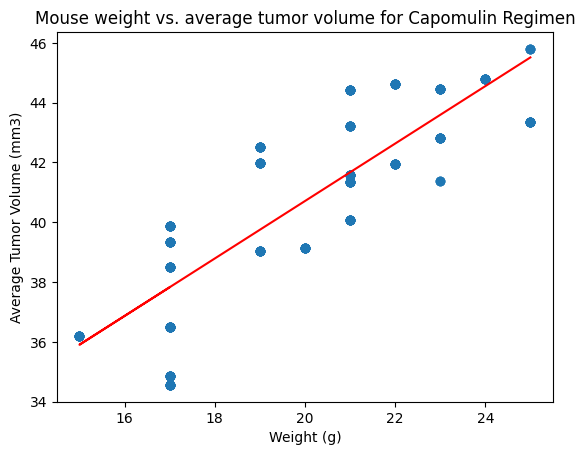

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(capomulin_average_data["Weight (g)"], capomulin_average_data["Average Tumor Volume (mm3)"])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_average_data["Weight (g)"], capomulin_average_data["Average Tumor Volume (mm3)"])
plt.scatter(capomulin_average_data["Weight (g)"], capomulin_average_data["Average Tumor Volume (mm3)"], marker="o")
plt.plot(capomulin_average_data["Weight (g)"], slope * capomulin_average_data["Weight (g)"] + intercept, color="red")
plt.title("Mouse weight vs. average tumor volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}.")